# Bayesian Neural Network implementation

In [1]:
import numpy as np
from datasets import generate_sinusoidal, generate_linear
import matplotlib.pyplot as plt
from network.bayesian_neural_network import BayesianNeuralNetwork

## Generate a synthetic dataset

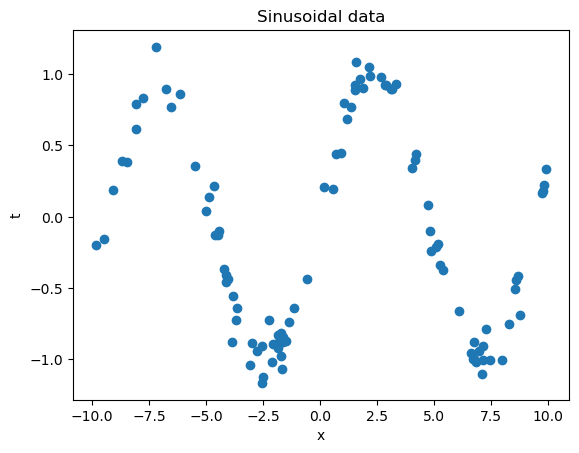

In [2]:
# Create synthetic training data
x, t = generate_sinusoidal(low=-10, high=10, size=100, scale=0.1)

# Plot the sinusoidal dataset
plt.scatter(x, t)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Sinusoidal data')
plt.show()

## Bayesian Neural Network implementation

In [139]:
# Create a bayesian neural network
bnn = BayesianNeuralNetwork(input_size=1, hidden_size=100, alpha=1, beta=10)

In [140]:
# Define the training epochs and learning rate
EPOCHS = 3_000_000
LEARNING_RATE = 8e-7

In [141]:
# Train the neural network
for epoch in range(EPOCHS):
    # Get the error and output
    output, e = bnn.forward(x, t)

    # Display the error
    if epoch % 30000 == 0:
        print(f"EPOCHS {epoch}, Score {e}")

    # Perform back-propagation
    bnn.backward(learning_rate=LEARNING_RATE)

EPOCHS 0, Score 102.87290411170733
EPOCHS 30000, Score 88.87519615802998
EPOCHS 60000, Score 85.46647943655884
EPOCHS 90000, Score 82.39512144563733
EPOCHS 120000, Score 79.53381199254994
EPOCHS 150000, Score 76.8314920322212
EPOCHS 180000, Score 74.27772512079403
EPOCHS 210000, Score 71.86401188230565
EPOCHS 240000, Score 69.58168449591871
EPOCHS 270000, Score 67.42223990185471
EPOCHS 300000, Score 65.37844067360294
EPOCHS 330000, Score 63.445609906565224
EPOCHS 360000, Score 61.62128828790061
EPOCHS 390000, Score 59.90348706368176
EPOCHS 420000, Score 58.28881536717186
EPOCHS 450000, Score 56.77197878554811
EPOCHS 480000, Score 55.34653219133621
EPOCHS 510000, Score 54.00568164630684
EPOCHS 540000, Score 52.74268994326689
EPOCHS 570000, Score 51.55106791860274
EPOCHS 600000, Score 50.42469424121943
EPOCHS 630000, Score 49.35790592356106
EPOCHS 660000, Score 48.34556625228077
EPOCHS 690000, Score 47.38310469994477
EPOCHS 720000, Score 46.4665255852441
EPOCHS 750000, Score 45.592387670

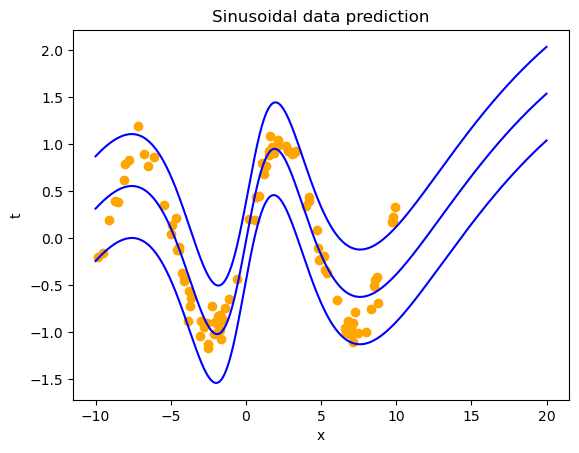

In [142]:
# Plot the result
x_test = np.arange(-10, 20, 0.01).reshape(-1, 1)
y_test, y_var = bnn.predict(x_test, x, t)
y_test_lower = y_test - np.sqrt(y_var)
y_test_upper = y_test + np.sqrt(y_var)

# Draw the prediction
plt.plot(x_test, y_test, color='blue')
plt.plot(x_test, y_test_lower, color='blue')
plt.plot(x_test, y_test_upper, color='blue')
plt.scatter(x, t, color='orange')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Sinusoidal data prediction')
plt.savefig('../figures/bayes_net.png')
plt.show()